# 와인 베스트 모델 찾은 후 자동 중단

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
wine = pd.read_csv('dataset/wine.csv', header=None)
wine.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(wine.iloc[:,:-1].values)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, wine.iloc[:,-1].values, 
    stratify=wine.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

### 모델 정의/설정

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
model = Sequential([
    Dense(30, input_dim=12, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

### 모델 저장관련 설정

In [8]:
modelpath = 'model/best_wine.h5'

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(
    modelpath, monitor='val_loss', verbose=1, save_best_only=True
)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=20)

### 모델 학습 및 저장

In [11]:
history = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=200, verbose=0,
    callbacks=[checkpointer, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.63452, saving model to model\best_wine.h5

Epoch 00002: val_loss improved from 0.63452 to 0.57737, saving model to model\best_wine.h5

Epoch 00003: val_loss improved from 0.57737 to 0.51327, saving model to model\best_wine.h5

Epoch 00004: val_loss improved from 0.51327 to 0.45118, saving model to model\best_wine.h5

Epoch 00005: val_loss improved from 0.45118 to 0.38812, saving model to model\best_wine.h5

Epoch 00006: val_loss improved from 0.38812 to 0.32422, saving model to model\best_wine.h5

Epoch 00007: val_loss improved from 0.32422 to 0.26086, saving model to model\best_wine.h5

Epoch 00008: val_loss improved from 0.26086 to 0.20673, saving model to model\best_wine.h5

Epoch 00009: val_loss improved from 0.20673 to 0.15826, saving model to model\best_wine.h5

Epoch 00010: val_loss improved from 0.15826 to 0.12070, saving model to model\best_wine.h5

Epoch 00011: val_loss improved from 0.12070 to 0.09141, saving model to model\best_

### 평가는 베스트 모델로 해야 함

In [12]:
from tensorflow.keras.models import load_model
best_model = load_model('model/best_wine.h5')

In [13]:
best_model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 788us/step - loss: 0.0270 - accuracy: 0.9920


[0.02697831206023693, 0.9919999837875366]

### 훈련과정 시각화

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

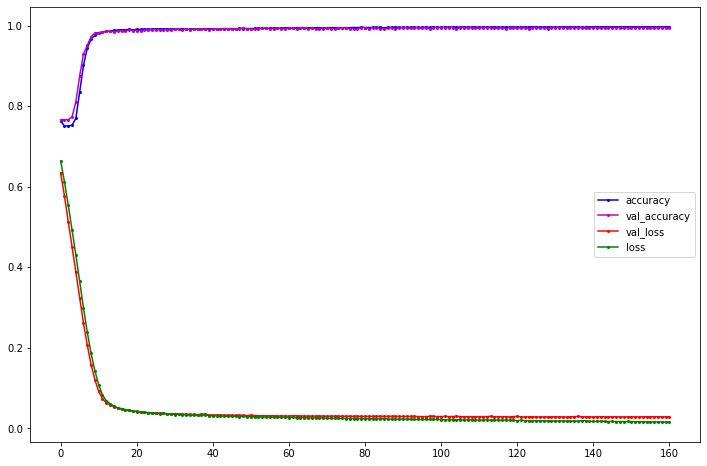

In [16]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vacc, 'mo-', markersize=2, label='val_accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.plot(x_len, y_loss, 'go-', markersize=2, label='loss')
plt.legend()
plt.show()